# Experimento "Aguja de Buffón"

El experimento de la aguja de bufón consiste en tomar una hoja de papel, trazar 7 rayas paralelas al lado más corto de la hoja.
Posteriormente, dejar caer agujas sobre la hoja y contabilizar cada que una aguja interseque con las rayas que trazamos.
Finalmete, calculamos la aproximación de $ \pi \approx \frac{2n}{p}$, siendo $n$ la cantidad de veces que se dejó caer la aguja y $p$ la cantidad de veces que alguna aguja intersecta con las rayas.

Consideraciones para el experimento:
Longitud de la aguja e interdistancias de las rectas paralelas: la aproximación anteriormente mostrada es útil bajo la suposición de que la distancia entre las rectas paralelas essss igual a la longitud de la aguja, que en caso de estas no serlo, tenemos una expresión similar que considera estos cambios en la proporción.

$\pi \approx \frac{2NL}{PD}$, tomando a $N$ el número de veces que se realizó el experimento, $L$ la longitud de la aguja, $P$ el número de veces que la aguja interseca con las rayas y $D$ la distancia entre una recta y otra.

Relación de longiud entre la aguja y la distancia, $L \leq D$.

## Solución analítica

Primero, consideremos que la probabilidad de que una aguja interseque con una de las rayas está dada por $\frac{2NL}{\pi D}$

Dicha relación sale del siguiente planteamiento:
Considerando las variables $x \in  [0, \frac{D}{2} ]$ y $\theta \in [0,\frac{\pi}{2}]$

Considerando esto, en caso de que el ángulo sea 0, es decir, paralelo no cruzará la raya, usando la función $Sin{\theta }$ nos permite modelar esta conducta, además de si x es menor que la mitad de la longitud se intersecta, estas dos condiciones nos permiten conocer si se intersecta o no.
Entonces la aguja intersecta si $x \leq \frac{L}{2} Sin {\theta} $ que posteriormente al integrar en sus respectivos límites nos otorga $\frac{2NL}{\pi D}$.

## Solución simulada

Considerando la solución analítica anterior, generamos las variables $x$ y  $Sin{\theta}$, ya que $\theta$ es uniforme y $Sin{theta}$ también comprendiendo valores entre 0 y 1. Psteriormente se contabiliza cada que la aguja intersecte bajo la condición $x \leq \frac{L}{2} Sin {\theta} $ y se utiliza la aproximación $\pi \approx \frac{2NL}{PD}$.

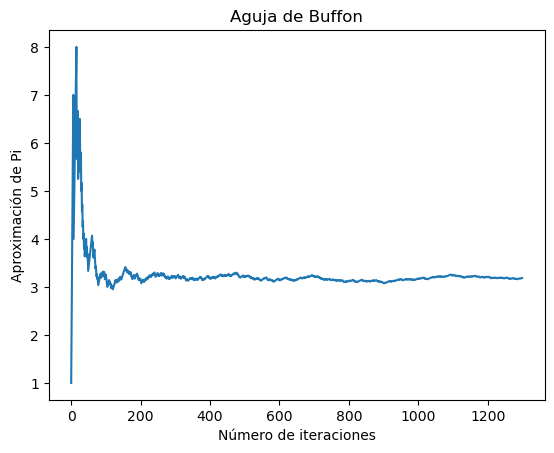

La aproximación de Pi es: 3.255237153290413


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def AdB(N, L, D):
    S_t=[]
    x=[]
    p=0
    Pi_app=[]
    for i in range(1,N+1):
        S_t_v=np.random.uniform(0,np.pi/2)
        x_v=np.random.uniform(0, D/2)
        if x_v<=(L/2)* np.sin(S_t_v):
            p+=1
        if p>0: 
            Pi_app.append((2*i*L)/(p*D))
        else:
            Pi_app.append(0)
    plt.plot(range(len(Pi_app)),Pi_app)
    plt.xlabel('Número de iteraciones')
    plt.ylabel('Aproximación de Pi')
    plt.title('Aguja de Buffon')
    plt.show()
    print("La aproximación de Pi es:",np.mean(Pi_app))
    

AdB(1300, 1, 2)

            
    



Una vez observamos en qué iteraciones el experimento tiene convergencia, realizamos la simulación.


La aproximación de Pi es: 3.1448827008538895


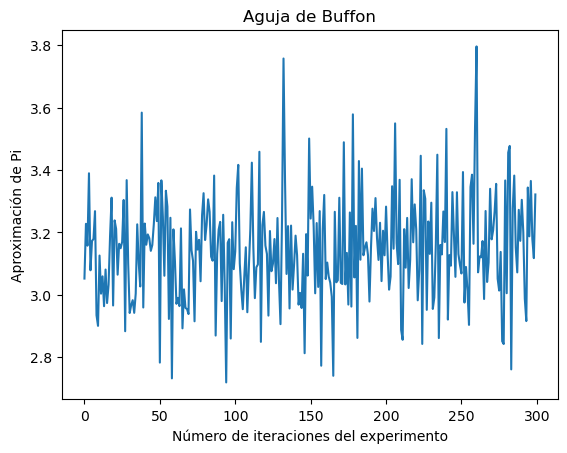

In [22]:
def Sim(n,N,L,D):
    mean=[]
    for i in range(n):
        S_t=[]
        x=[]
        p=0
        Pi_app=[]
        for i in range(1,N+1):
            S_t_v=np.random.uniform(0,np.pi/2)
            x_v=np.random.uniform(0, D/2)
            if x_v<=(L/2)* np.sin(S_t_v):
                p+=1
            if p>0: 
                Pi_app.append((2*i*L)/(p*D))
            else:
                Pi_app.append(0)
        mean.append(np.mean(Pi_app))
    print("La aproximación de Pi es:",np.mean(mean))
    plt.plot(range(len(mean)),mean)
    plt.xlabel('Número de iteraciones del experimento')
    plt.ylabel('Aproximación de Pi')
    plt.title('Aguja de Buffon')
    plt.show()

Sim(300,1300,1,2)
        

Finalmente, podemos establecer una aproximación de Pi, sin embargo, como podemos ver en la dispersión de la aproximación, es muy inestable el método aún cuando las iteraciones son muchas.